# Задание по прикладным методам оптимизации

# Шегай Павел ИУ6-45Б

## Задание

Реализовать метод Хука-Дживса для выбрванной функции и сравнить с методом циклического спуска.

Функция: f = 3x² + 4xy + 3y²

Чтобы посмотреть, как изменилось направление спуска, возьмем в качестве начальной точки ту же точку, что была в циклическом спуске (3, 2).

alpha возьмем фиксированный alpha = 2 = const, E = 0.001. Для наглядности delta возьмем равным 0.1

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 3 * x**2 + 4 * x * y + 3 * y**2

def hooke_jeeves(f, x0, y0, delta=0.1, alpha=2, E=0.001, max_iter=1000):
    x, y = x0, y0
    history = [(x, y)]
    
    for _ in range(max_iter):
        # Исследующий поиск
        x_new, y_new = x, y
        improved = False
        
        # Пробуем изменить x
        for dx in [delta, -delta]:
            if f(x + dx, y) < f(x_new, y_new):
                x_new, y_new = x + dx, y
                improved = True
        
        # Пробуем изменить y
        for dy in [delta, -delta]:
            if f(x_new, y + dy) < f(x_new, y_new):
                x_new, y_new = x_new, y + dy
                improved = True
        
        # Если улучшения нет, уменьшаем шаг
        if not improved:
            delta /= 2
            if delta < E:
                break
            continue
        
        # Поиск по образцу
        while True:
            x_pattern = x_new + alpha * (x_new - x)
            y_pattern = y_new + alpha * (y_new - y)
            
            if f(x_pattern, y_pattern) < f(x_new, y_new):
                x, y = x_new, y_new
                x_new, y_new = x_pattern, y_pattern
                history.append((x_new, y_new))
            else:
                x, y = x_new, y_new
                break
    
    return x, y, f(x, y), history

# Начальная точка
x0, y0 = 3, 2

x_opt, y_opt, f_opt, history = hooke_jeeves(f, x0, y0)



## Визуализация

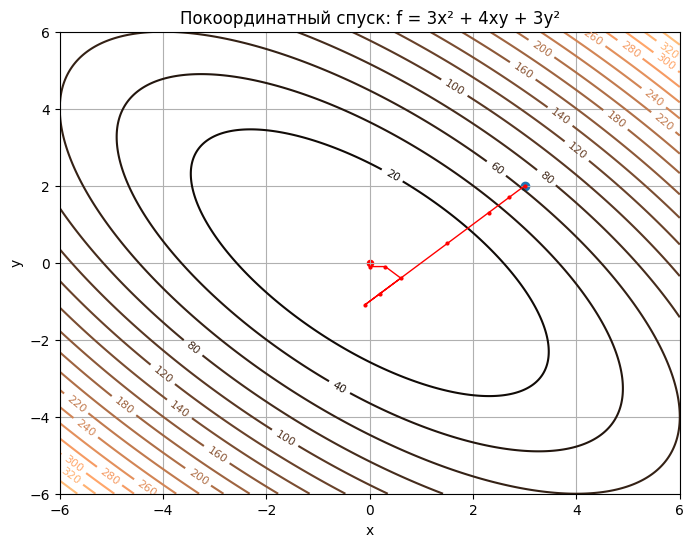

In [40]:
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-6, 6, 400)
xx, yy = np.meshgrid(x_vals, y_vals)
f = f(xx, yy)

plt.figure(figsize=(8, 6))
contours = plt.contour(xx, yy, f, levels=20, cmap='copper')
plt.clabel(contours, inline=True, fontsize=8, fmt='%.0f')
path_x, path_y = zip(*history)
plt.plot(path_x, path_y, 'ro-', markersize=2, linewidth=1)
plt.scatter(x0, y0)
plt.scatter(x_opt, y_opt, c='red', s=20)


plt.title('Метод Хука-Дживса для функции f(x, y) = 3x² + 4xy + 3y²')


plt.title("Покоординатный спуск: f = 3x² + 4xy + 3y²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Результат покоординатного спуска 

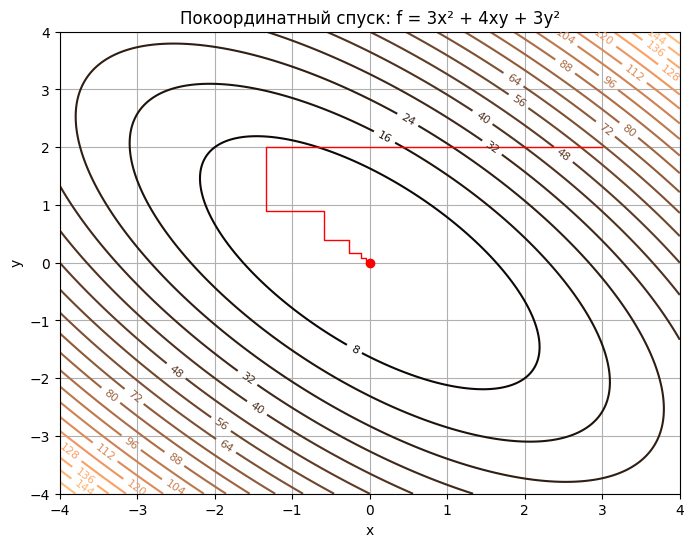

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Заданная матрица A (уже в стандартном базисе)
A = np.array([[3, 2],
              [2, 3]])

# Целевая функция
def f(x):
    return x.T @ A @ x
# Алгоритм покоординатного спуска (формальный)
def coordinate_descent_formal(x0, E=0.001, max_iter=1000):
    x_prev = x0.copy()
    n = len(x0)
    path = [x0.copy()]
    k = 1

    for _ in range(max_iter):
        x = x_prev.copy()
        for j in range(n):
            e_j = np.zeros(n)
            e_j[j] = 1

            # Шаг 1: минимизируем f(x + b * e_j)
            def p(b):
                return f(x + b * e_j)

            res = minimize_scalar(p)
            b_opt = res.x
            x = x + b_opt * e_j
            path.append(x.copy())

        # Шаг 3: проверка на сходимость
        if np.linalg.norm(x - x_prev) < E:
            break
        else:
            x_prev = x.copy()
            k += 1

    return x, np.array(path)


# Запуск с начальной точки
x0 = np.array([3, 2])
xmin, path = coordinate_descent_formal(x0)

# Визуализация
xx, yy = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
f = np.array([f(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(xx.shape)

def grad_f(x):
    return 2 * A @ x

plt.figure(figsize=(8, 6))
contours = plt.contour(xx, yy, f, levels=20, cmap='copper')
plt.clabel(contours, inline=True, fontsize=8, fmt='%.0f')
plt.plot(path[:, 0], path[:, 1], color='red', linewidth=1)
plt.quiver(xmin[0], xmin[1], *(-grad_f(xmin)), angles='xy', scale_units='xy', scale=5, color='red')
plt.scatter(*xmin, color='red', zorder=5)
plt.title("Покоординатный спуск: f = 3x² + 4xy + 3y²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
